<a href="https://colab.research.google.com/github/abir-pramanik/brain-tumor-detection-final-project/blob/main/brain_tumor_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
from google.colab import drive
from tensorflow.keras.models import save_model


In [30]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
IMG_HEIGHT, IMG_WIDTH = 100, 100
CLASSES = ['glioma', 'meningioma', 'pituitary', 'notumor']

def load_data(directory):
    X, y = [], []
    for label in CLASSES:
        path = os.path.join(directory, label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            X.append(img)
            y.append(CLASSES.index(label))
    return np.array(X), np.array(y)


In [33]:
# Update with your actual dataset path
train_dir = '/content/drive/MyDrive/archive/Training'
test_dir = '/content/drive/MyDrive/archive/Testing'

X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)
X_test = X_test.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=len(CLASSES))
y_test_cat = to_categorical(y_test, num_classes=len(CLASSES))


In [34]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,028 (16.61 MB)

 Trainable params: 4,353,028 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 584ms/step - accuracy: 0.9729 - loss: 0.0777 - val_accuracy: 0.9626 - val_loss: 0.1188
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 580ms/step - accuracy: 0.9721 - loss: 0.0723 - val_accuracy: 0.9649 - val_loss: 0.1158
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 546ms/step - accuracy: 0.9767 - loss: 0.0600 - val_accuracy: 0.9672 - val_loss: 0.1110
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 543ms/step - accuracy: 0.9848 - loss: 0.0446 - val_accuracy: 0.9680 - val_loss: 0.1255
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 542ms/step - accuracy: 0.9854 - loss: 0.0385 - val_accuracy: 0.9672 - val_loss: 0.1174
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 545ms/step - accuracy: 0.9892 - loss: 0.0360 - val_accuracy: 0.9710 - val_loss: 0.1135
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 534ms/step - accuracy: 0.9876 - loss: 0.0340 - val_accuracy: 0.9703 - val_loss: 0.1238
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 534ms/step - accuracy: 0.9920 - l

In [37]:
model.save('cnn_brain_tumor_model.h5')


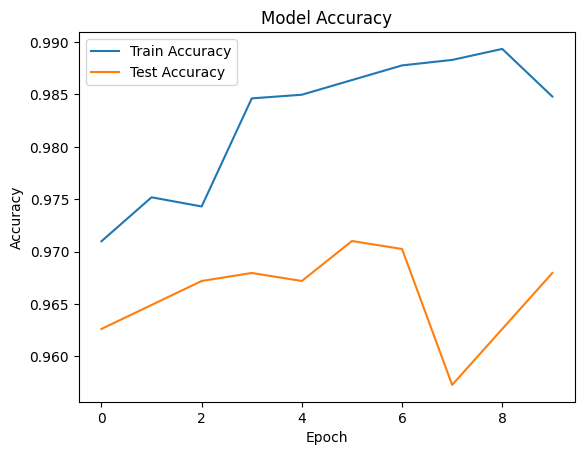

In [38]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


Saving Te-no_0357.jpg to Te-no_0357.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


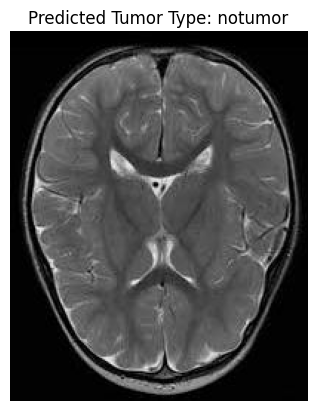

In [43]:
uploaded = files.upload()

for fname in uploaded.keys():
    path = fname
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0
    img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)

    prediction = model.predict(img)
    predicted_class = CLASSES[np.argmax(prediction)]

    plt.imshow(cv2.imread(path))
    plt.title(f"Predicted Tumor Type: {predicted_class}")
    plt.axis(False)
    plt.show()
